In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium import plugins

In [154]:
abb_df_EDA = pd.read_csv('/Users/nli/dev/airflow_home/data/abb_df2.csv')

In [155]:
abb_df_EDA.shape

(48870, 12)

In [156]:
abb_df_EDA.dtypes

host_id                             int64
borough                            object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [157]:
abb_df_EDA.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.887000e+04,48870.000000,48870.000000,48870.000000,48870.000000,48870.000000,48870.000000,48870.000000,48870.000000
mean,6.762985e+07,40.728952,-73.952172,152.759402,6.840311,23.277143,1.091070,7.146286,112.728443
std,7.862005e+07,0.054534,0.046163,240.199363,16.453077,44.556389,1.597354,32.960753,131.596499
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.821708e+06,40.690093,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.080150e+07,40.723080,-73.955690,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763127,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,365.000000,629.000000,58.500000,327.000000,365.000000


In [158]:
abb_df_EDA.corr()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.020216,0.127042,0.015301,-0.019157,-0.140244,0.209711,0.154943,0.203635
latitude,0.020216,1.000000,0.084824,0.033895,0.029893,-0.015356,-0.018717,0.019521,-0.010876
longitude,0.127042,0.084824,1.000000,-0.149932,-0.073948,0.058978,0.138399,-0.114735,0.082869
price,0.015301,0.033895,-0.149932,1.000000,0.053605,-0.047931,-0.050540,0.057461,0.081876
minimum_nights,-0.019157,0.029893,-0.073948,0.053605,1.000000,-0.095235,-0.149114,0.161516,0.164525
number_of_reviews,-0.140244,-0.015356,0.058978,-0.047931,-0.095235,1.000000,0.589283,-0.072409,0.172223
reviews_per_month,0.209711,-0.018717,0.138399,-0.050540,-0.149114,0.589283,1.000000,-0.047356,0.163978
calculated_host_listings_count,0.154943,0.019521,-0.114735,0.057461,0.161516,-0.072409,-0.047356,1.000000,0.225867
availability_365,0.203635,-0.010876,0.082869,0.081876,0.164525,0.172223,0.163978,0.225867,1.000000


In [159]:
abb_df_EDA.isnull().sum()

host_id                           0
borough                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [160]:
#Distribution of price
set(abb_df_EDA['borough'])
('Bronx', 'Boroklyn', 'Manhattan', 'Queens', 'Staten Island')
abb_df_EDA.groupby('borough')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,1090.0,87.577064,106.725371,10.0,45.0,65.0,99.0,2500.0
Brooklyn,20089.0,124.452238,186.922112,10.0,60.0,90.0,150.0,10000.0
Manhattan,21654.0,196.888011,291.421157,10.0,95.0,150.0,220.0,10000.0
Queens,5664.0,99.493997,167.125802,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


In [161]:
#pivot table
abb_df_EDA_pt = abb_df_EDA.pivot_table(index='borough', columns='room_type', values='price', aggfunc='mean')
abb_df_EDA_pt

room_type,Entire home/apt,Private room,Shared room
borough,,,
Bronx,127.506596,66.890937,59.800000
Brooklyn,178.356844,76.553547,50.773723
Manhattan,249.276359,116.776622,88.933194
Queens,147.031996,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


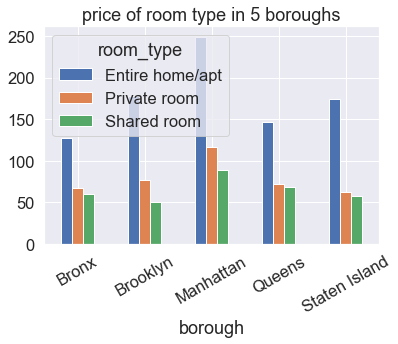

In [162]:
abb_df_EDA_pt.plot(kind = 'bar', legend = True, rot = 30, title='price of room type in 5 boroughs')


In [163]:
#borough breakdown (TOP 5 expensive neighbourhood in each borough)
for boro in set(abb_df_EDA['borough']):
    print(abb_df_EDA.loc[abb_df_EDA['borough']==boro].groupby(['borough', 'neighbourhood']).agg({
        'price':['count', 'mean']}).sort_values(by=('price', 'mean'), ascending=False).head())
    print()

                       price            
                       count        mean
borough neighbourhood                   
Bronx   Riverdale         11  442.090909
        City Island       18  173.000000
        Spuyten Duyvil     4  154.750000
        Eastchester       13  141.692308
        Unionport          7  137.142857

                          price            
                          count        mean
borough  neighbourhood                     
Brooklyn Sea Gate             7  487.857143
         Cobble Hill         99  211.929293
         Brooklyn Heights   154  209.064935
         DUMBO               36  196.305556
         Vinegar Hill        34  187.176471

                             price       
                             count   mean
borough       neighbourhood              
Staten Island Fort Wadsworth     1  800.0
              Woodrow            1  700.0
              Prince's Bay       4  409.5
              Randall Manor     19  336.0
              Willowbroo

In [164]:
#The minimum nights for each borough
abb_df_EDA.groupby('borough')['minimum_nights'].describe()

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,1090.0,4.563303,15.638775,1.0,1.0,2.0,3.0,365.0
Brooklyn,20089.0,5.894569,14.533385,1.0,2.0,3.0,5.0,365.0
Manhattan,21654.0,8.345617,18.824170,1.0,1.0,3.0,6.0,365.0
Queens,5664.0,5.010240,11.952636,1.0,1.0,2.0,3.0,365.0
Staten Island,373.0,4.831099,19.727605,1.0,1.0,2.0,3.0,365.0


In [165]:
# Analysis on the price corr with reviews per month
for boro in set(abb_df_EDA['borough']):
    print(boro)
    print(abb_df_EDA[abb_df_EDA['borough']==boro][['price', 'reviews_per_month']].corr())
    print()

Bronx
                      price  reviews_per_month
price              1.000000          -0.070353
reviews_per_month -0.070353           1.000000

Brooklyn
                      price  reviews_per_month
price              1.000000          -0.023134
reviews_per_month -0.023134           1.000000

Staten Island
                      price  reviews_per_month
price              1.000000          -0.104056
reviews_per_month -0.104056           1.000000

Manhattan
                      price  reviews_per_month
price              1.000000          -0.044209
reviews_per_month -0.044209           1.000000

Queens
                      price  reviews_per_month
price              1.000000          -0.049866
reviews_per_month -0.049866           1.000000



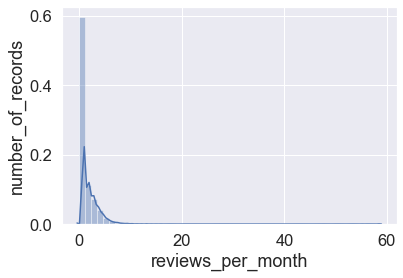

In [166]:
sns.distplot(abb_df_EDA['reviews_per_month'])
plt.ylabel('number_of_records')
plt.show()

In [167]:
# Borough analysis --Bronx <cell-tag: Bronx>
abb_df_EDA_bk = abb_df_EDA[abb_df_EDA['borough']=='Bronx']
abb_df_EDA_bk.shape

(1090, 12)

In [168]:
# Borough analysis --Brooklyn <cell-tag: Brooklyn>
abb_df_EDA_bk = abb_df_EDA[abb_df_EDA['borough']=='Brooklyn']
abb_df_EDA_bk.shape

(20089, 12)

In [169]:
abb_df_EDA_bk = abb_df_EDA[abb_df_EDA['borough']=='Manhattan']
abb_df_EDA_bk.shape

(21654, 12)

In [170]:
abb_df_EDA_bk = abb_df_EDA[abb_df_EDA['borough']=='Queens']
abb_df_EDA_bk.shape

(5664, 12)

In [171]:
abb_df_EDA_bk = abb_df_EDA[abb_df_EDA['borough']=='Staten Island']
abb_df_EDA_bk.shape

(373, 12)

In [172]:
#More Data Visualization 

In [173]:
abb_df_EDA.head()

,host_id,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a452cab50>,
      dtype=object)

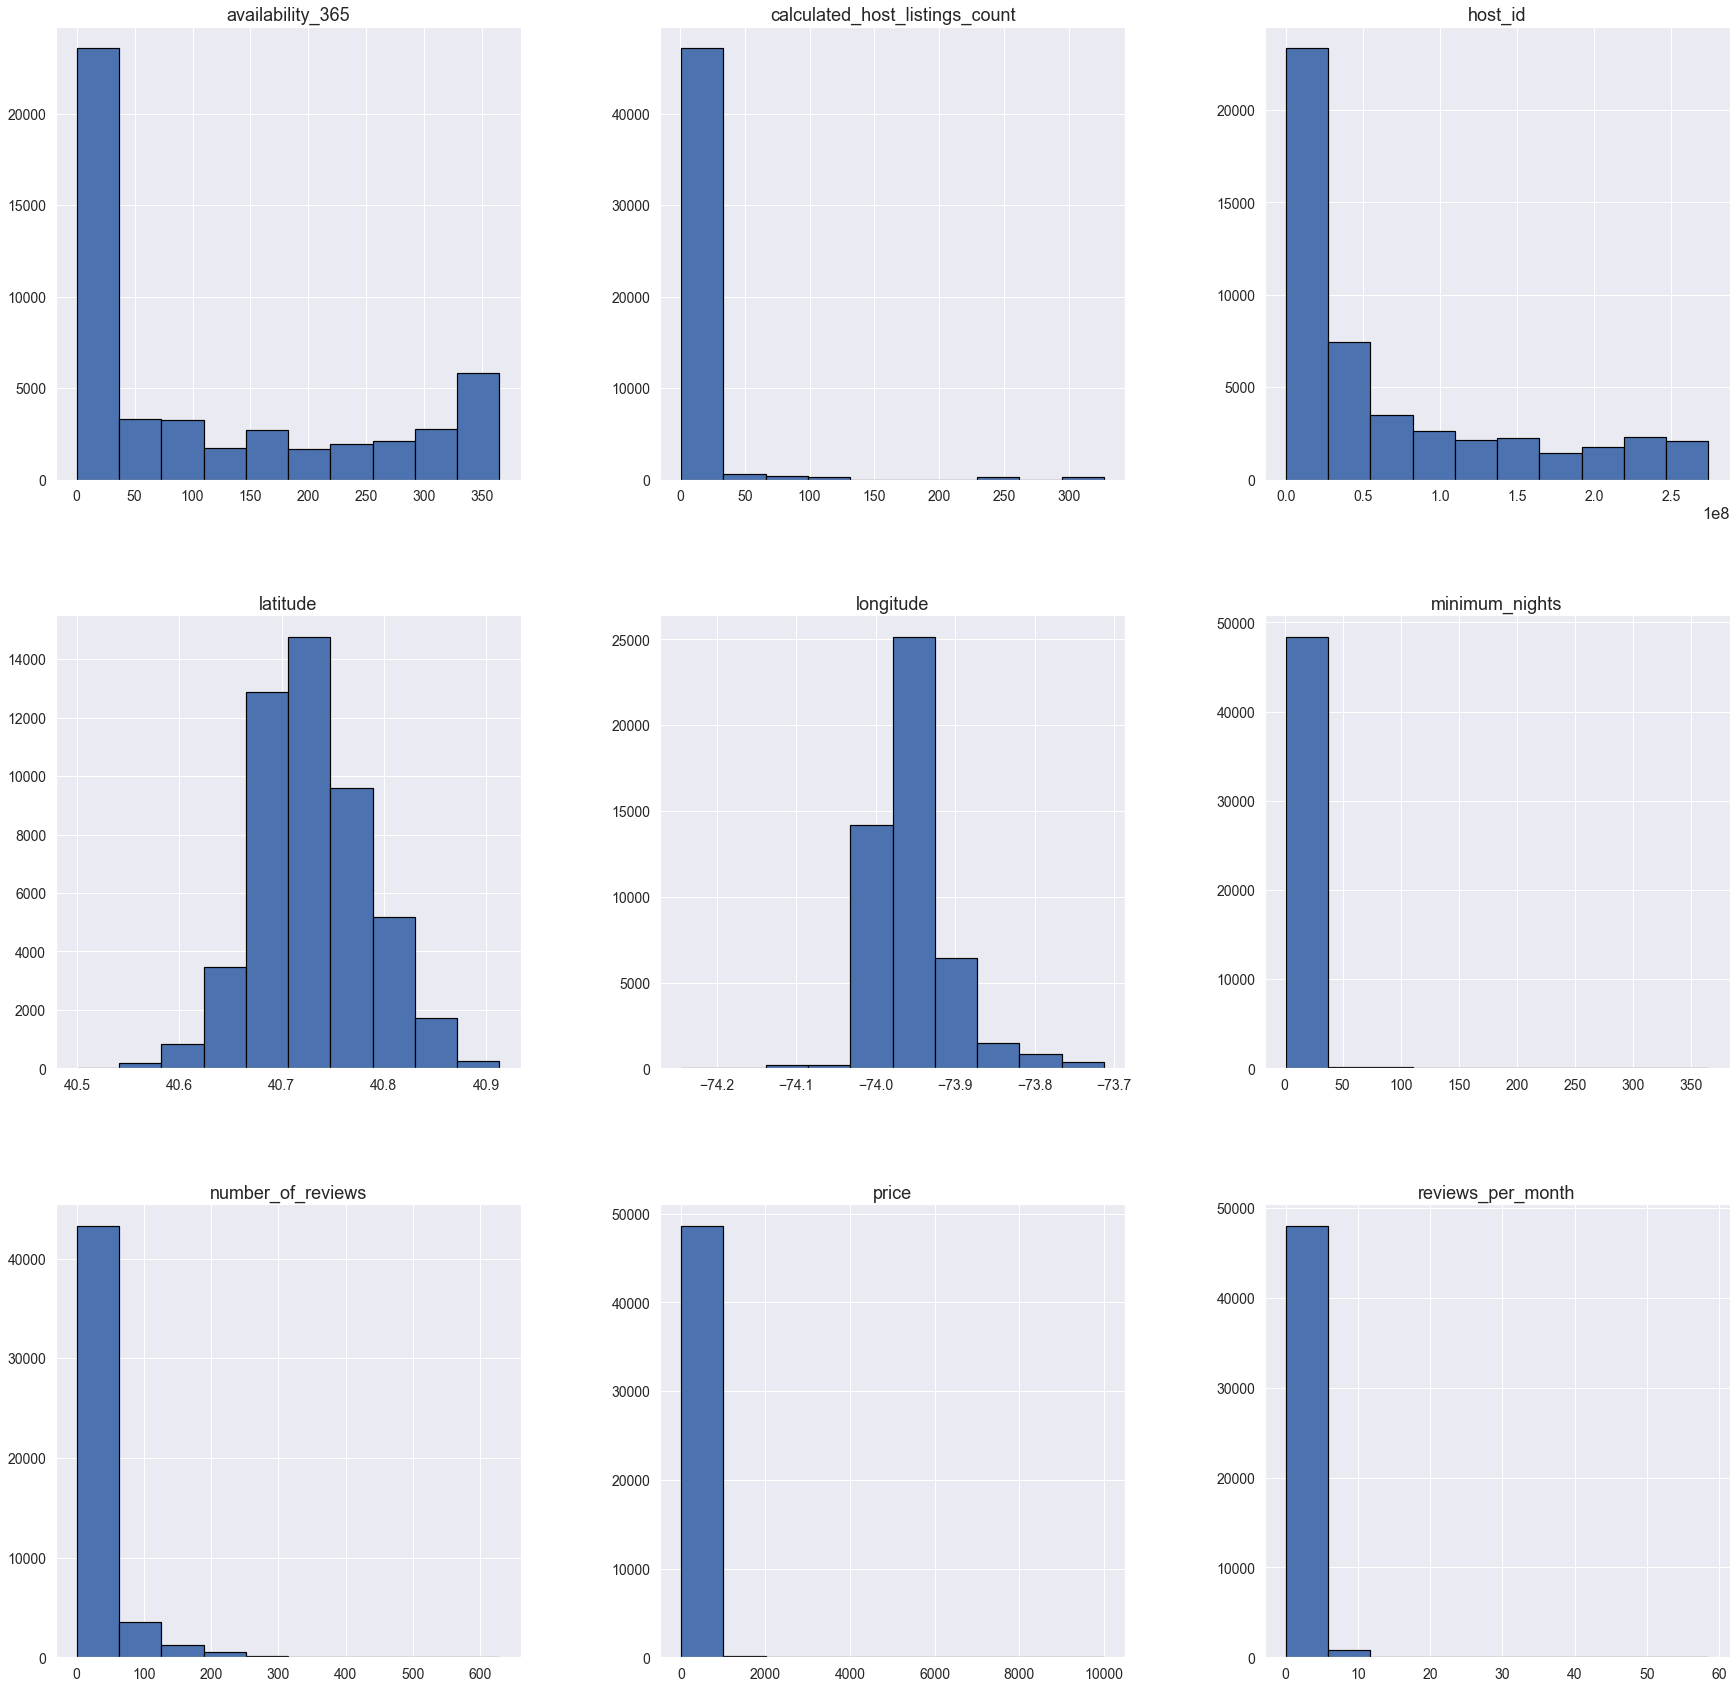

In [174]:
#Big Picture
abb_df_EDA_vis.hist(edgecolor='black', linewidth=1.2, figsize=(30,30), xlabelsize=14, ylabelsize=14)

<Figure size 2160x2160 with 0 Axes>

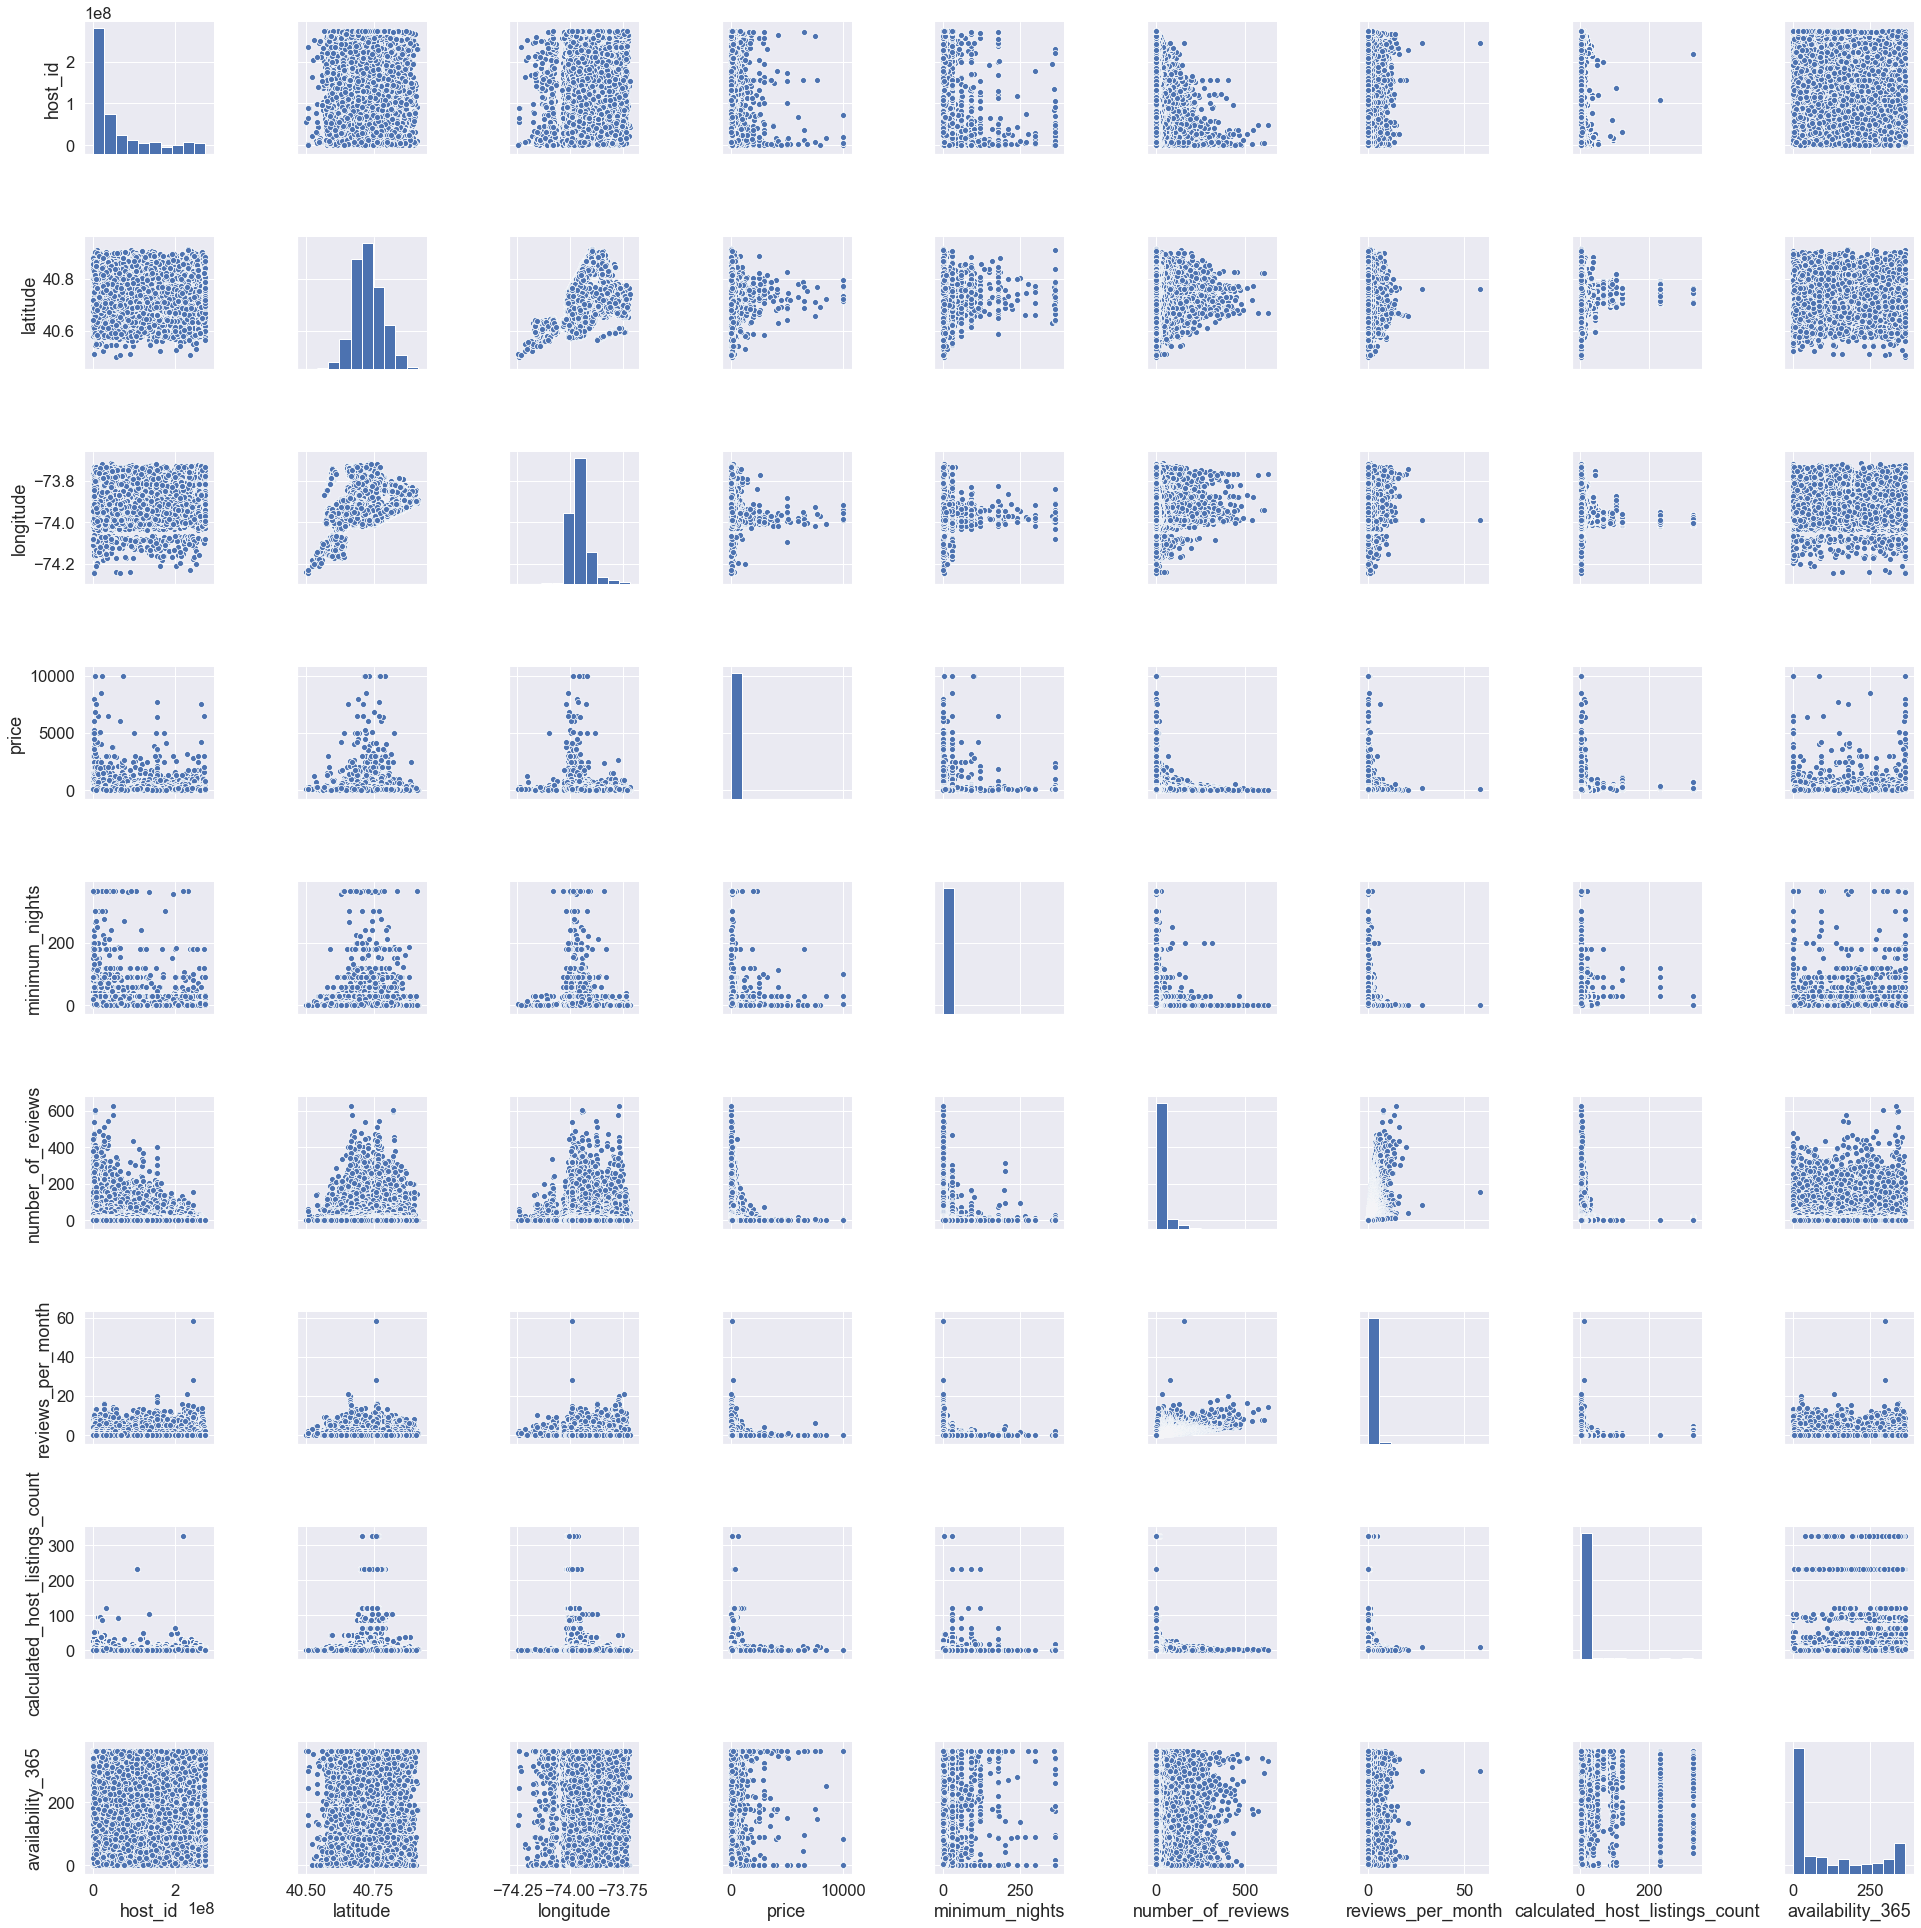

In [175]:
#Big Picture
plt.figure(figsize=(30, 30))
sns.pairplot(abb_df_EDA_vis, height =3, diag_kind='auto')

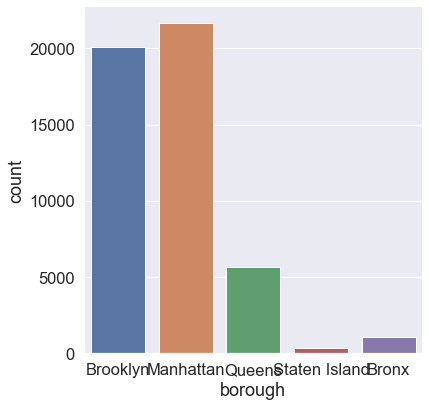

In [176]:
# Borough Vis
sns.catplot('borough', data=abb_df_EDA_vis, kind = 'count', height =6)

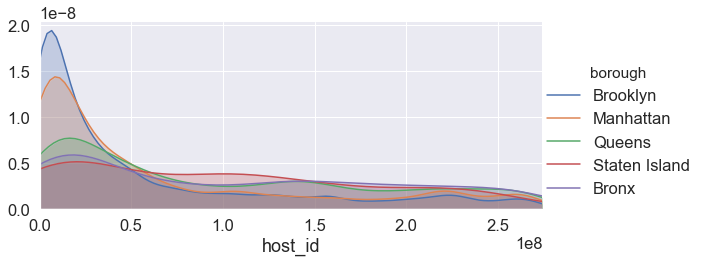

In [177]:
#KDE plot
fig = sns.FacetGrid(abb_df_EDA_vis, hue = 'borough', aspect = 2, height = 4)
fig.map(sns.kdeplot, 'host_id', shade=True)
oldest = abb_df_EDA_vis['host_id'].max()
fig.set(xlim=(0, oldest))
fig.set()
fig.add_legend()

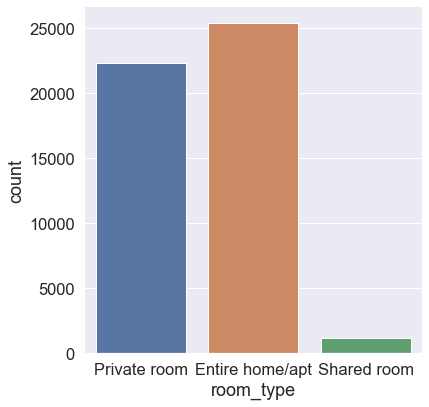

In [178]:
sns.catplot('room_type', data=abb_df_EDA_vis, kind = 'count', height =6)

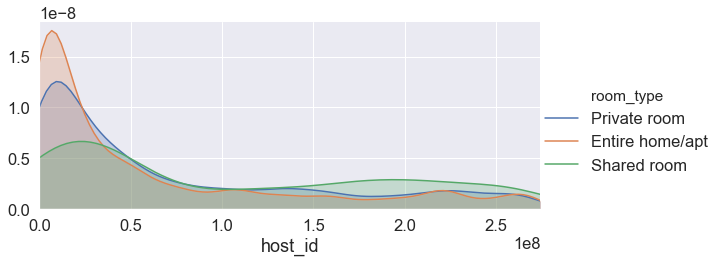

In [179]:
fig = sns.FacetGrid(abb_df_EDA_vis, hue = 'room_type', aspect = 2, height = 4)
fig.map(sns.kdeplot, 'host_id', shade=True)
oldest = abb_df_EDA_vis['host_id'].max()
fig.set(xlim=(0, oldest))
fig.set()
fig.add_legend()

<BarContainer object of 10 artists>

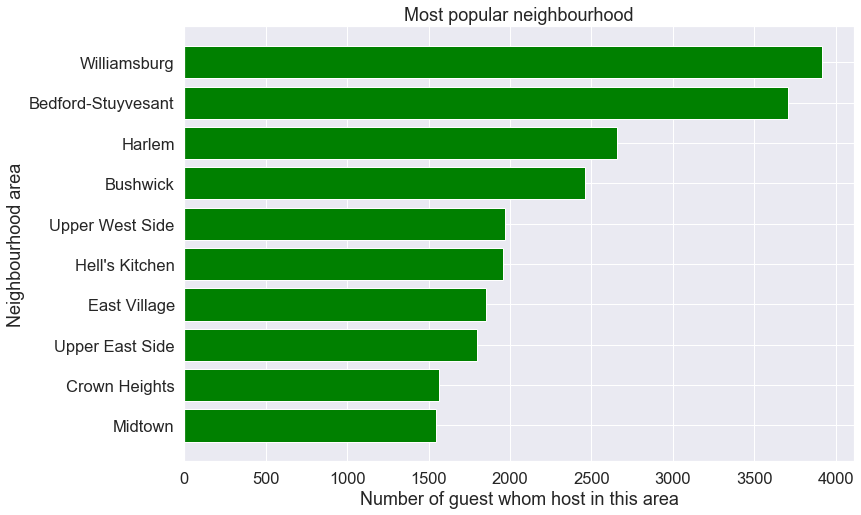

In [180]:
#The most popular neigbourhood
data = abb_df_EDA_vis.neighbourhood.value_counts()[:10]
plt.figure(figsize=(12,8))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular neighbourhood")
plt.xlabel("Number of guest whom host in this area")
plt.ylabel("Neighbourhood area")

plt.barh(x, y, color = 'green')


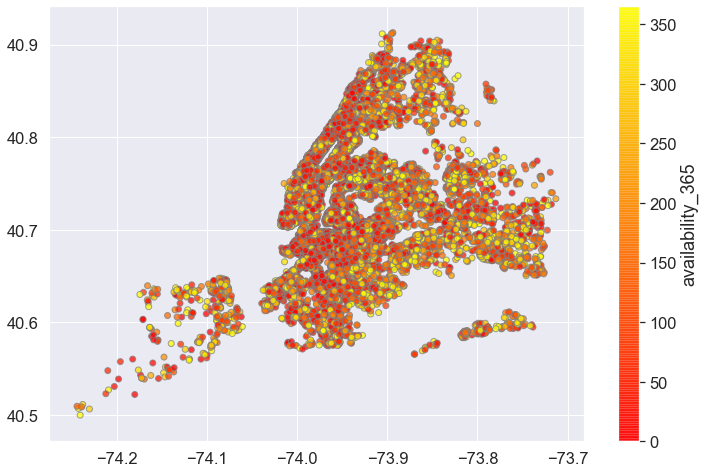

In [181]:
#Mapping available days
plt.figure(figsize=(12,8))
plt.scatter(abb_df_EDA_vis.longitude, abb_df_EDA_vis.latitude, c=abb_df_EDA_vis.availability_365,
           cmap='autumn', edgecolor='gray', linewidth=1, alpha=0.75)

color_bar = plt.colorbar()
color_bar.set_label('availability_365')

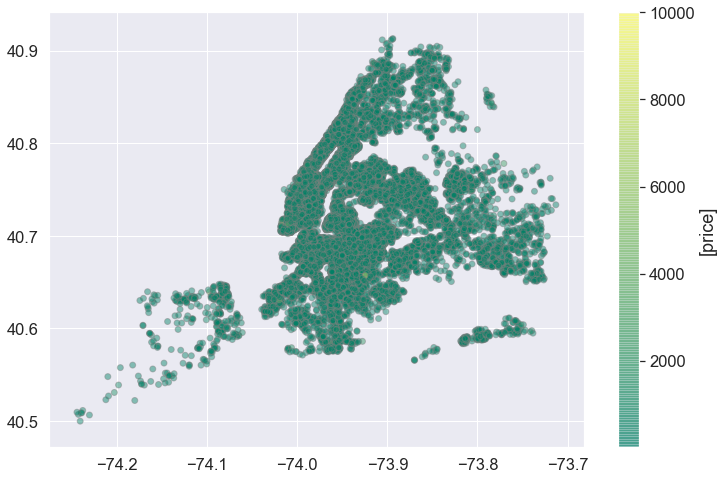

In [182]:
#Mapping price
plt.figure(figsize=(12,8))
plt.scatter(abb_df_EDA_vis.longitude, abb_df_EDA_vis.latitude, c=abb_df_EDA_vis.price,
           cmap='summer', edgecolor='gray', linewidth=1, alpha=0.45)

color_bar = plt.colorbar()
color_bar.set_label('[price]')

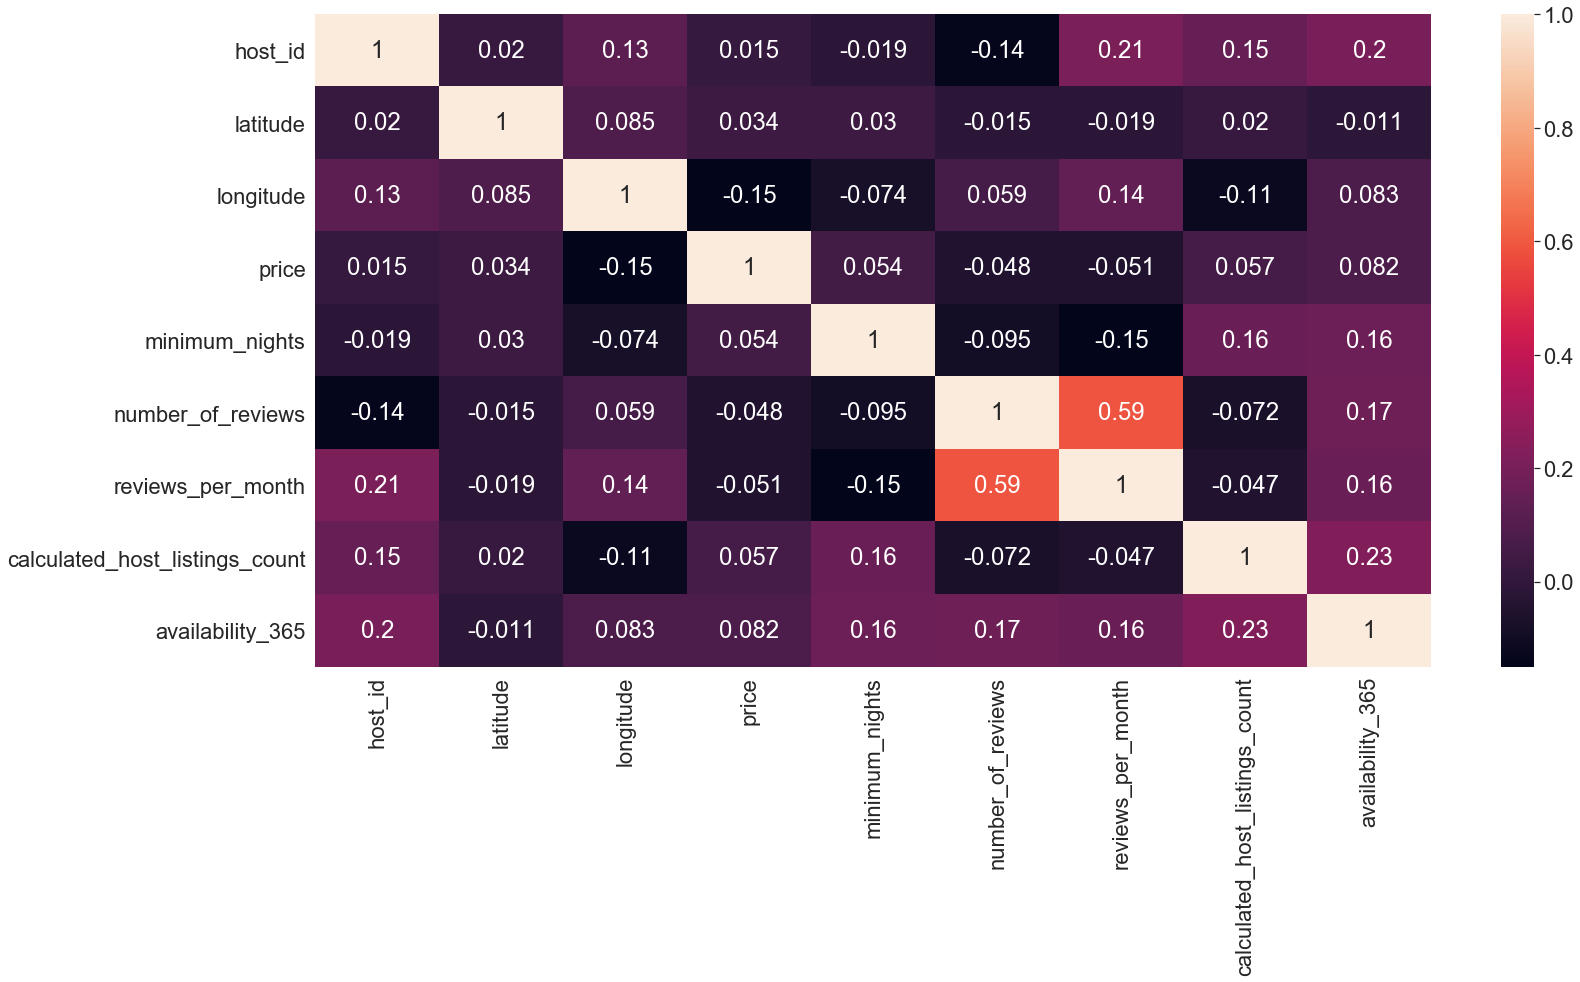

In [183]:
# Corrlation matric
sns.set(font_scale =2)
plt.figure(figsize =(25, 12))
sns.heatmap(abb_df_EDA_vis.corr(), annot=True)

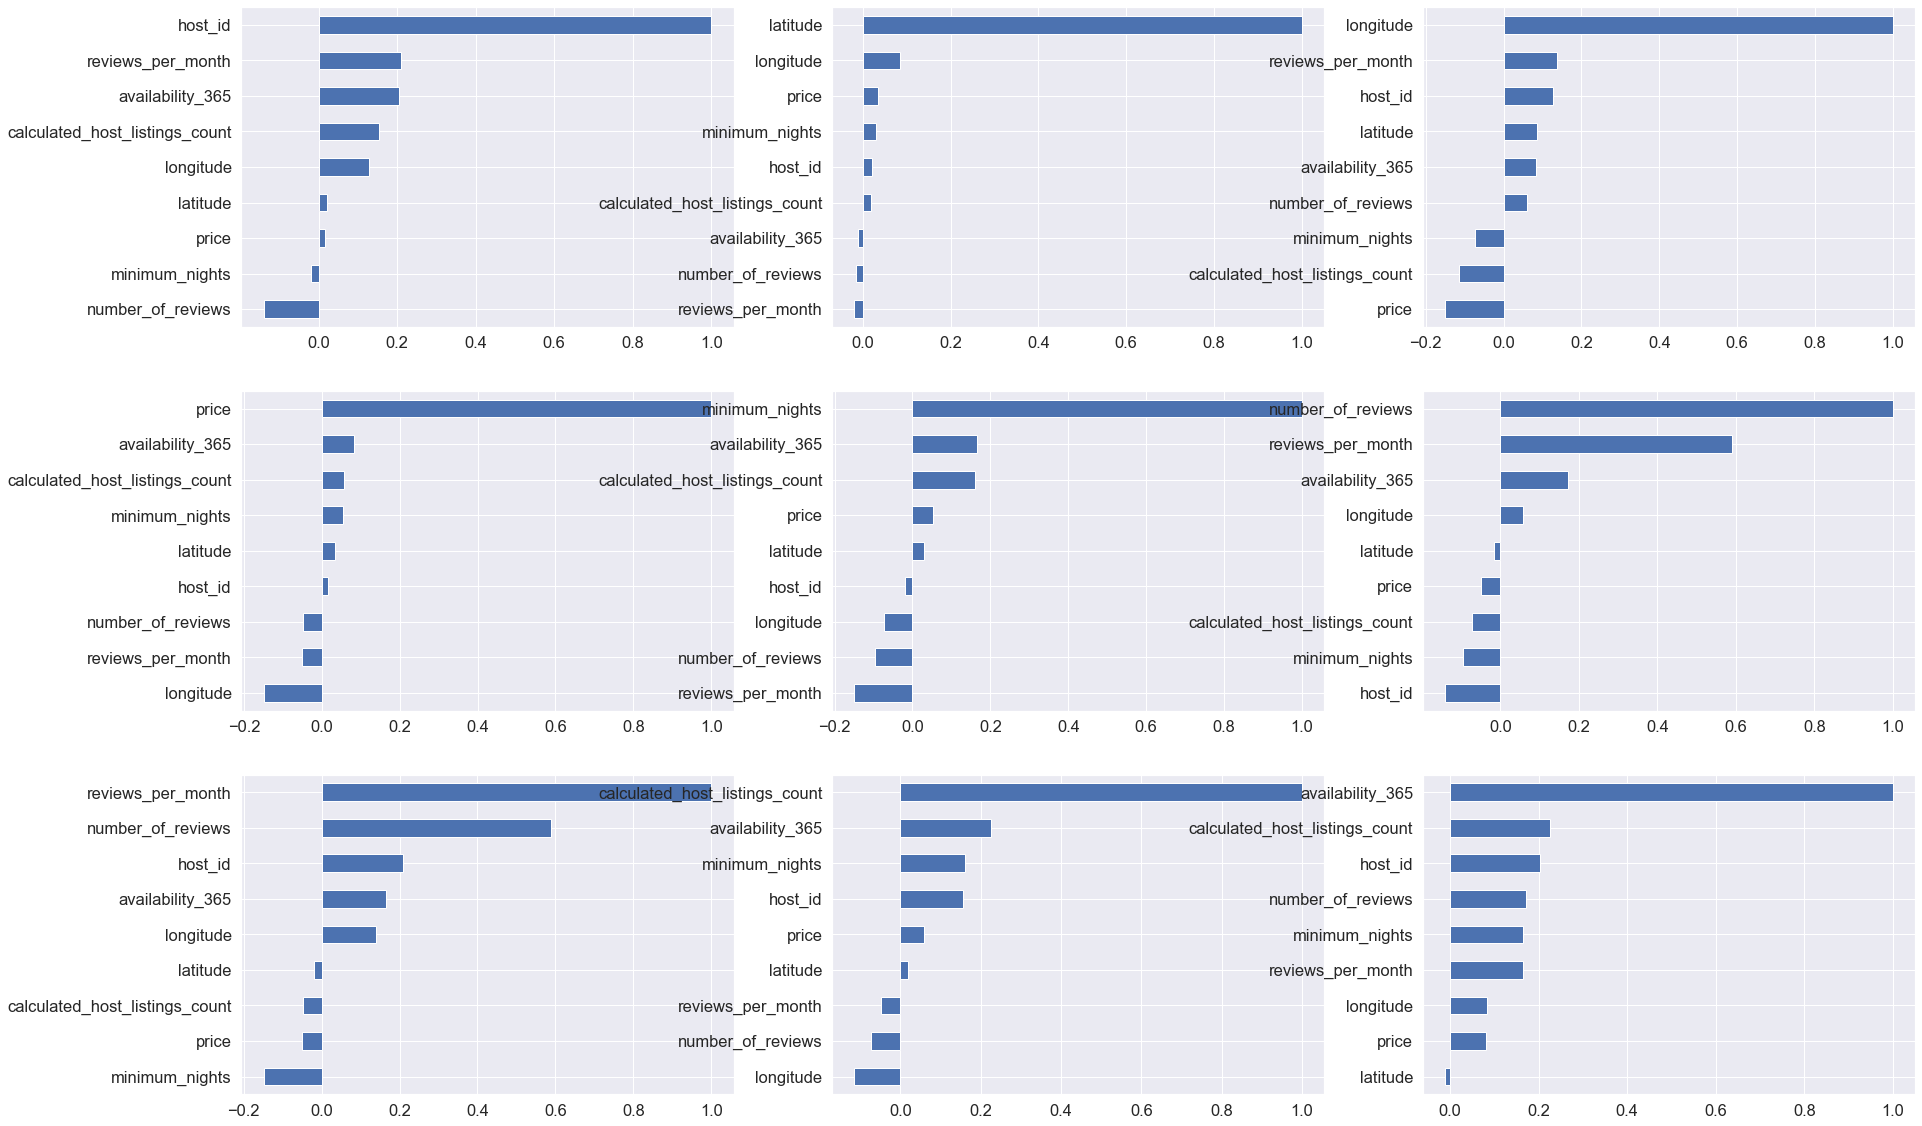

In [184]:
# correlation plot on bar chart
plt.figure(figsize=(30,20))
sns.set(font_scale=1.5)
i = 1
for column in abb_df_EDA_vis.columns:
    if abb_df_EDA_vis[column].dtype == "float64" or abb_df_EDA_vis[column].dtype == 'int64':
        plt.subplot(3, 3, i)
        abb_df_EDA_vis.corr()[column].sort_values().plot(kind='barh')
        i += 1

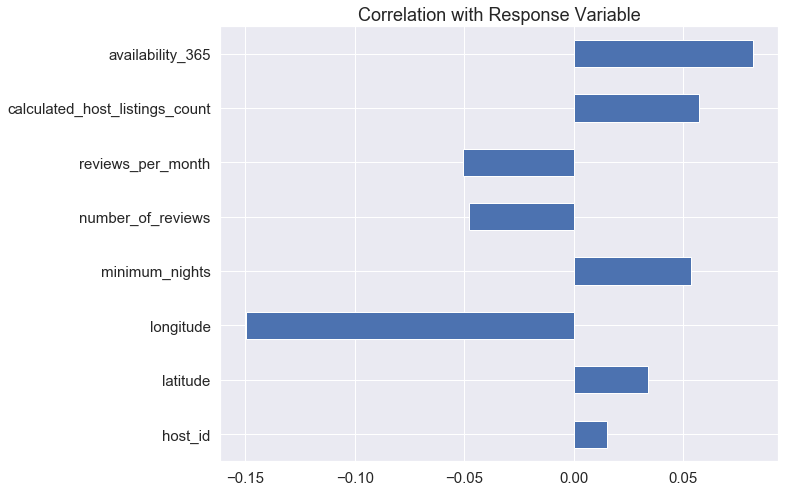

In [185]:
#All other feature correlation with price
abb_df_EDA_vis.drop('price', axis=1).corrwith(abb_df_EDA_vis.price).plot.barh(figsize=(10, 8),
                                    title='Correlation with Response Variable', fontsize=15, grid=True)

In [186]:
# Categorical Features
col = list(abb_df_EDA_vis.columns)
col

['host_id',
 'borough',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [187]:
categorical_col = []
for column in abb_df_EDA_vis.columns:
    if len(abb_df_EDA_vis[column].unique()) <= 8:
        print("-------------------------------------------------------------------------------------")
        print(f"{column}:{abb_df_EDA_vis[column].unique()}")
        categorical_col.append(column)

-------------------------------------------------------------------------------------
borough:['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
-------------------------------------------------------------------------------------
room_type:['Private room' 'Entire home/apt' 'Shared room']


In [188]:
categorical_col

['borough', 'room_type']

In [189]:
#Here, the categorical_cols are shown by each borough and room_type
categ_data = pd.get_dummies(abb_df_EDA_vis, columns = categorical_col)
categ_data.head()

,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2787,Kensington,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0,0,0,0,1,0
1,2845,Midtown,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0
2,4632,Harlem,40.80902,-73.94190,150,3,0,0.00,1,365,0,0,1,0,0,0,1,0
3,4869,Clinton Hill,40.68514,-73.95976,89,1,270,4.64,1,194,0,1,0,0,0,1,0,0
4,7192,East Harlem,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,1,0,0,1,0,0


In [190]:
print(abb_df_EDA_vis.columns)
print(categ_data.columns)

Index(['host_id', 'borough', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
Index(['host_id', 'neighbourhood', 'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'borough_Bronx',
       'borough_Brooklyn', 'borough_Manhattan', 'borough_Queens',
       'borough_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')


In [191]:
print(categ_data.describe().loc["mean", :].round(3))
print("---------------------------------------------------")
print(categ_data.describe().loc["std", :].round(3))

host_id                           6.762985e+07
latitude                          4.072900e+01
longitude                        -7.395200e+01
price                             1.527590e+02
minimum_nights                    6.840000e+00
number_of_reviews                 2.327700e+01
reviews_per_month                 1.091000e+00
calculated_host_listings_count    7.146000e+00
availability_365                  1.127280e+02
borough_Bronx                     2.200000e-02
borough_Brooklyn                  4.110000e-01
borough_Manhattan                 4.430000e-01
borough_Queens                    1.160000e-01
borough_Staten Island             8.000000e-03
room_type_Entire home/apt         5.200000e-01
room_type_Private room            4.570000e-01
room_type_Shared room             2.400000e-02
Name: mean, dtype: float64
---------------------------------------------------
host_id                           7.862005e+07
latitude                          5.500000e-02
longitude                   

In [192]:
#Sklearn machine learning study
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [193]:
col_to_scale = ['host_id', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                'calculated_host_listings_count', 'availability_365']

std_scaler = StandardScaler()
categ_data[col_to_scale] = std_scaler.fit_transform(categ_data[col_to_scale])

label = LabelEncoder()
categ_data['neighbourhood'] = label.fit_transform(categ_data['neighbourhood'])

In [194]:
print(categ_data.describe().loc["mean", :].round(3))
print("===============================================")
print(categ_data.describe().loc["std", :].round(3))

host_id                            -0.000
neighbourhood                     107.136
latitude                           40.729
longitude                         -73.952
price                             152.759
minimum_nights                     -0.000
number_of_reviews                   0.000
reviews_per_month                   0.000
calculated_host_listings_count     -0.000
availability_365                    0.000
borough_Bronx                       0.022
borough_Brooklyn                    0.411
borough_Manhattan                   0.443
borough_Queens                      0.116
borough_Staten Island               0.008
room_type_Entire home/apt           0.520
room_type_Private room              0.457
room_type_Shared room               0.024
Name: mean, dtype: float64
host_id                             1.000
neighbourhood                      68.743
latitude                            0.055
longitude                           0.046
price                             240.199
minimum

In [195]:
categ_data.head()

,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-0.860185,108,40.64749,-73.97237,149,-0.354971,-0.320432,-0.551586,-0.034778,1.917028,0,1,0,0,0,0,1,0
1,-0.860184,127,40.75362,-73.98377,225,-0.354971,0.487541,-0.445159,-0.156135,1.841037,0,0,1,0,0,1,0,0
2,-0.860161,94,40.80902,-73.94190,150,-0.233412,-0.522425,-0.683055,-0.186475,1.917028,0,0,1,0,0,0,1,0
3,-0.860158,41,40.68514,-73.95976,89,-0.354971,5.537374,2.221779,-0.186475,0.617588,0,1,0,0,0,1,0,0
4,-0.860129,61,40.79851,-73.94399,80,0.192044,-0.320432,-0.620451,-0.186475,-0.856631,0,0,1,0,0,1,0,0


In [204]:
categ_data.shape

(48870, 18)

In [205]:
# Model Building
from sklearn.model_selection import train_test_split
X = categ_data.drop(['price'], axis = 1)
y = categ_data.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [210]:
from sklearn import metrics

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [211]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [212]:
print_evaluate(y_test, lin_reg.predict(X_test))

MAE: 73.48363681044732
MSE: 48772.10222468333
RMSE: 220.84406766921165
R2 Square 0.10086135883642655
